# 系统工程导论第一次作业

彭程 2020011075

## 1.实现数据可视化

In [1]:
import scipy.io as scio
import matplotlib.pyplot as plt
import numpy as np
import mpl_toolkits.axisartist as axisartist
 
dataFile = 'data.mat'
data = scio.loadmat(dataFile)


m_data = data['data']
mdata = []#mdata即为读取得到的list形式的车流量数据
for i in range(0,len(m_data)):
    mdata.append(m_data[i][0])

In [2]:
def pltshow(adata,title,xlabel,ylabel):
    plt.rcParams['font.sans-serif']=['SimHei']   #用来正常显示中文标签
    plt.rcParams['axes.unicode_minus']=False    #用来正常显示负号
    plt.figure(figsize=(16,8))                   #分辨率参数-dpi，画布大小参数-figsize
    plt.xticks(fontsize=10)                      #改变文字大小参数-fontsize
    plt.grid(True)
    plt.plot(adata,label='f(t)')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

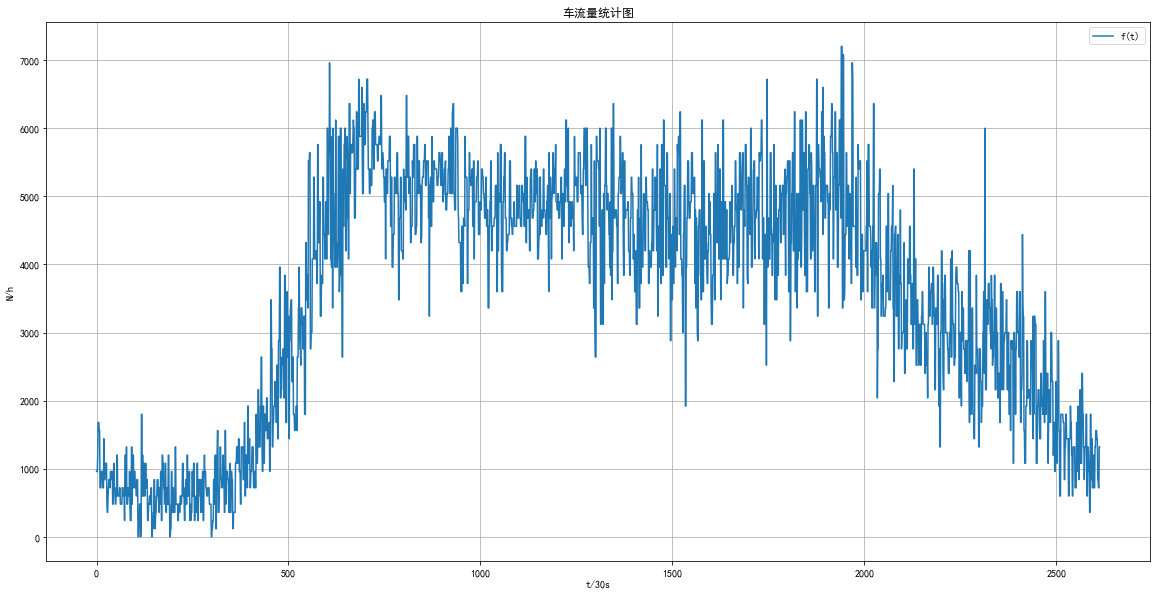

In [3]:
pltshow(mdata,'车流量统计图','t/30s','N/h')

## 2.使用移动平均法处理数据并绘制曲线（选取N=5，30）

简单移动平均的各元素的权重都相等。简单的移动平均的计算公式如下：
$$
F_t=(A_{t_{-1}}+A_{t_{-2}}+A_{t_{-3}}+…+A_{t_{-N}})/N
$$
式中:

- $F_t$为对下一期的预测值；
- N为移动平均的时期个数；
- $At_1$为前期实际值；
- $At_2$到$At_n$分别表示前两期、前三期直至前n期的实际值。

In [4]:
def MA(adata, N):
    data_ma=[]
    lenth= len(adata)
    temp=0
    for i in range(N-1,lenth):
        data_ma.append(round(sum(adata[(i+1-N):(i+1)])/N))#对前N项求平均
    pltshow(data_ma,'车流量统计图（移动平均法，N={})'.format(N),'t/30s','N/h')

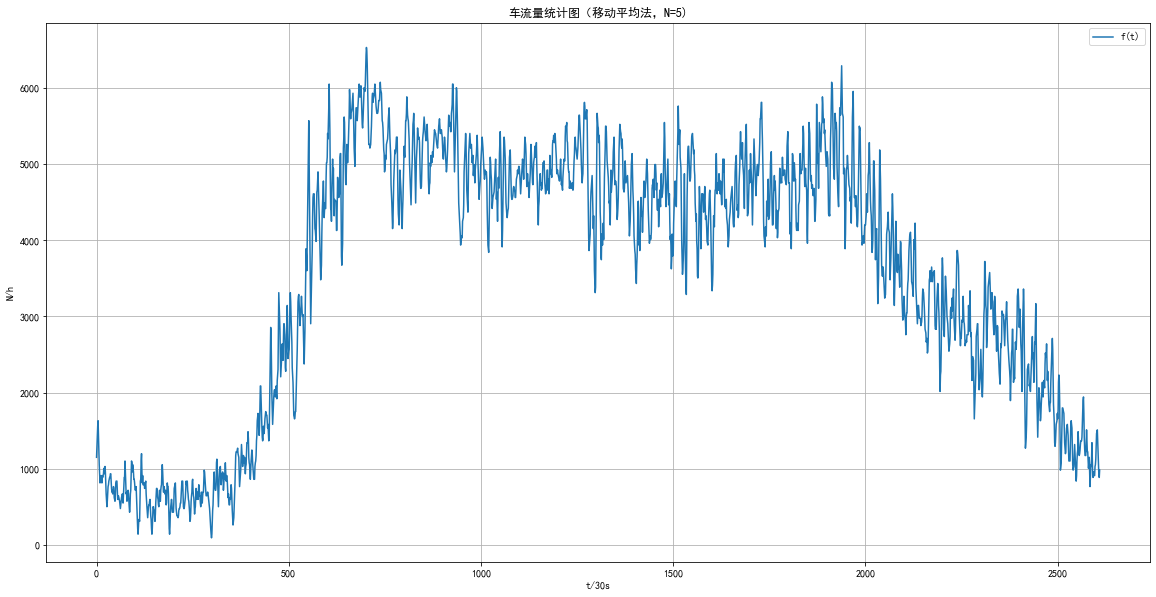

In [5]:
MA(mdata,5)

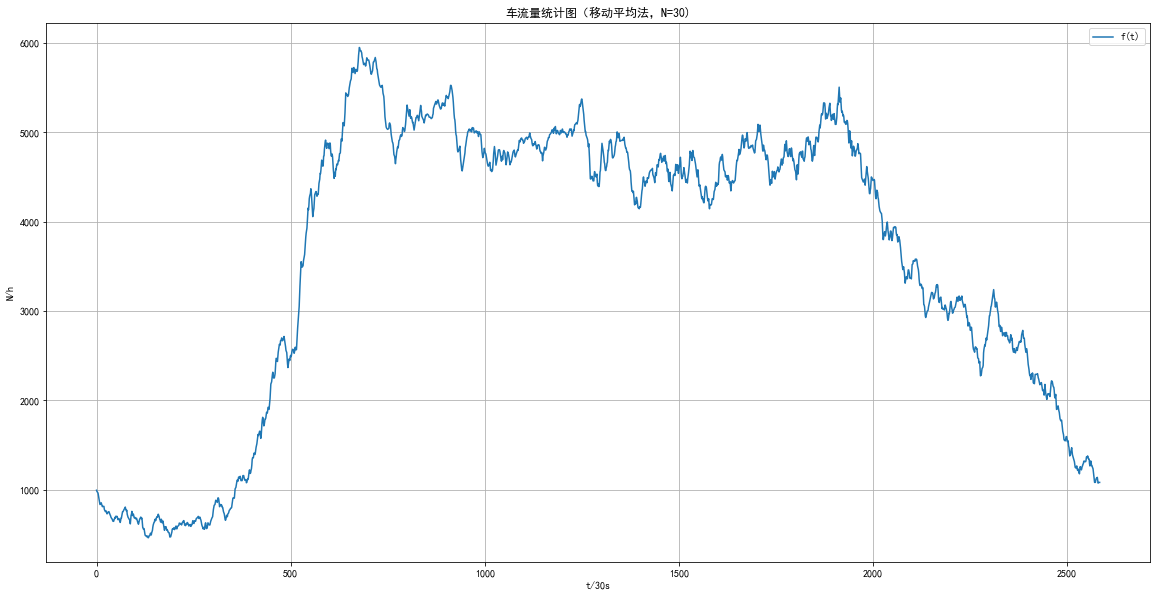

In [6]:
MA(mdata,30)

## 3.使用指数平滑法处理数据并绘制曲线（选择指数$\alpha$=0.2,0.05）

指数平滑法指给过去的观测值不一样的权重，即较近期观测值的权数比较远期观测值的权数要大

指数平滑法的基本公式：$S(t)=a\cdot y(t)+(1-a)\cdot S(t_{-1})$ 式中，

　　$S(t)$--时间t的平滑值；

　　$y(t)$--时间t的实际值；

　　$S(t_{-1})$--时间$t_{-1}$的平滑值；

　　$a$--平滑常数，其取值范围为[0,1]

据平滑次数不同，指数平滑法分为：一次指数平滑法、二次指数平滑和三次指数平滑法等。

***本质：把t的平滑值当做t+1的预测值***

In [7]:
def ES(adata,a):
    data_es=[]
    lenth= len(adata)
    temp=0
    data_es.append(adata[0])
    for i in range(1,lenth):
        data_es.append(a*adata[i]+(1-a)*data_es[i-1])#进行指数平滑
    pltshow(data_es,'车流量统计图（指数平滑法，a={})'.format(a),'t/30s','N/h')

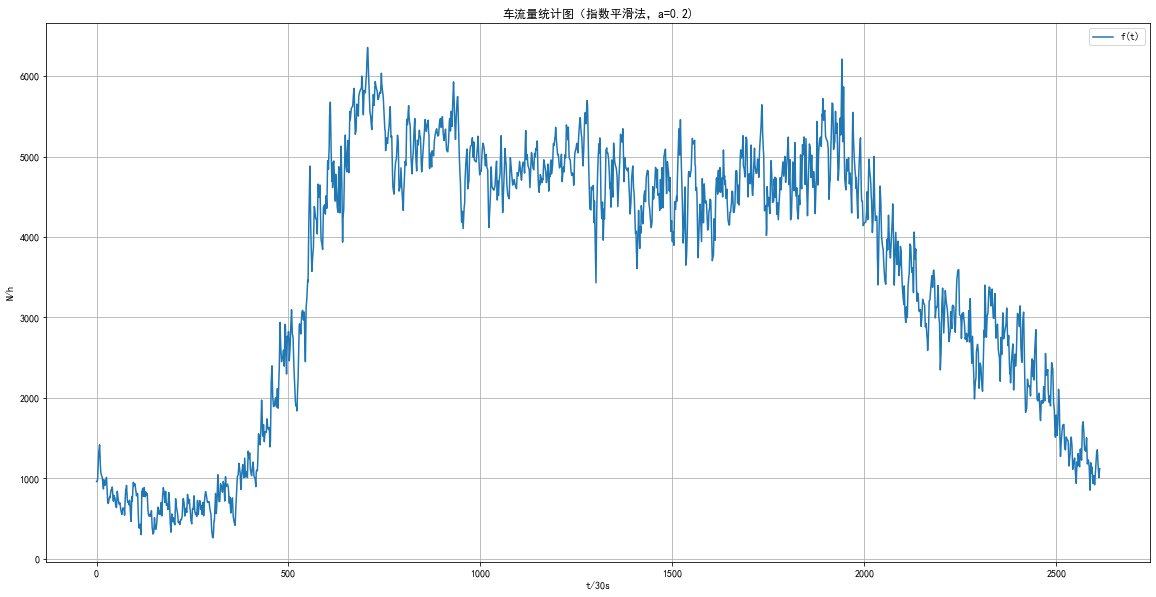

In [8]:
ES(mdata,0.2)

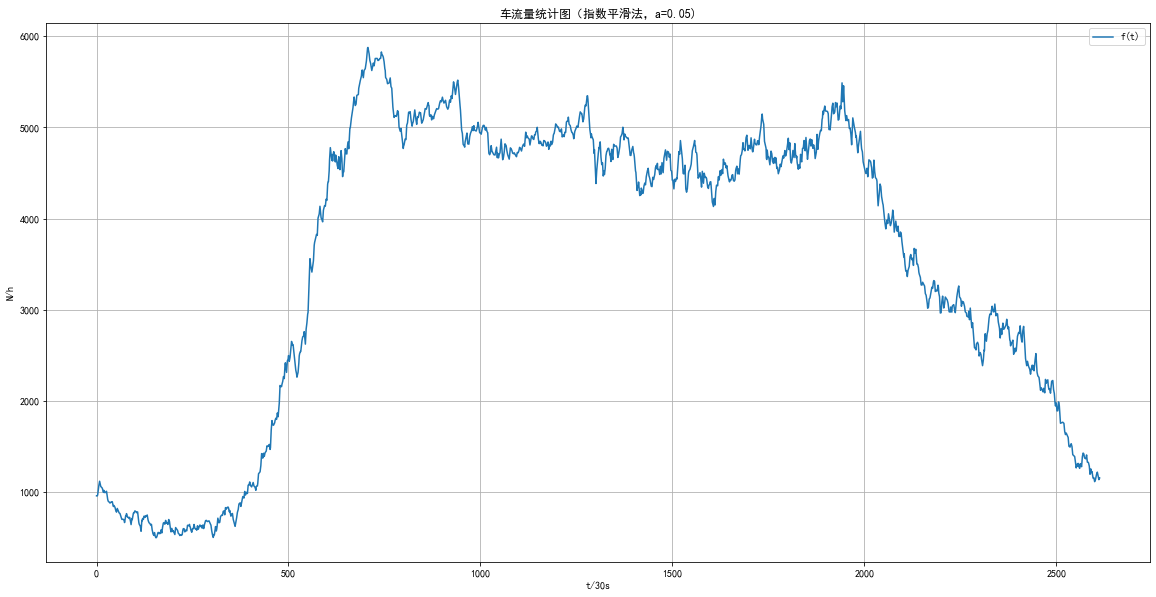

In [9]:
ES(mdata,0.05)

## 4.推导上述两种方法的增量形式

### 4.1 移动平均法增量形式
移动平均的计算公式如下：
$$
F_t=(A_{t_{-1}}+A_{t_{-2}}+A_{t_{-3}}+…+A_{t_{-N}})/N
$$
则：
$$
F_{t+1}=(A_{t_{0}}+A_{t_{-1}}+A_{t_{-2}}+…+A_{t_{-(N-1)}})/N
$$
则：
$$
    F_{t+1}=F_{t}+\frac{(A_{t_{0}}-A_{t_{-N}})}{N}
$$

### 4.2 指数平滑法增量形式
指数平滑的计算公式如下：
$$
S(t)=a\cdot y(t)+(1-a)\cdot S(t_{-1})
$$
可见已经是增量形式

## 5.使用ARIMA处理数据并绘制图像

ARIMA(p，d，q)模型是ARMA(p，q)模型的扩展。ARIMA(p，d，q)模型可以表示为：
$$
(1-L)^dX_t=(1+\sum_{i=1}^q\theta_iL^i)\epsilon_t+\sum_{i=1}^p\phi_iL^iX_t
$$
其中：
* L为滞后算子，$L^d\cdot X_t=X_{t-d}$
* p为自回归项数
* q为滑动平均项数
* d为差分次数，一般应用中取一到二次差分即可
* $\epsilon_t=y_t-X_t$，其中x为估计值，y为实际值


取一阶差分，同时认为权值相等，我们可以将上述式子整理为：
$$
X_t=\mu+\sum_{i=1}^q\theta_iL^i(y_t-X_t)+\sum_{i=1}^p\phi_iL^iX_t
$$

In [10]:
def ARIMA(adata,p,q):
    data_arima=[]
    lenth=len(adata)
    temp=0
    data_temp=0
    for i in range(0,5):
        data_arima.append(adata[i])
    for i in range(4,max(p,q)):
        data_arima.append(round(sum(adata[(i+1-5):(i+1)])/5))#对于前若干项(max(p,q))采取移动平均策略
    for i in range(max(p,q),lenth):
        for j in range(0,q):
            temp+=(adata[i-j-1]-data_arima[i-j-1])
        data_temp+=(temp/q)
        temp=0
        for k in range(0,p):
            temp+=adata[i-k-1]
        data_temp+=(temp/p)
        temp=0
        data_arima.append(data_temp)
        data_temp=0
    pltshow(data_arima,'车流量统计图（ARIMA，(p={},d={},q={}))'.format(p,1,q),'t/30s','N/h')

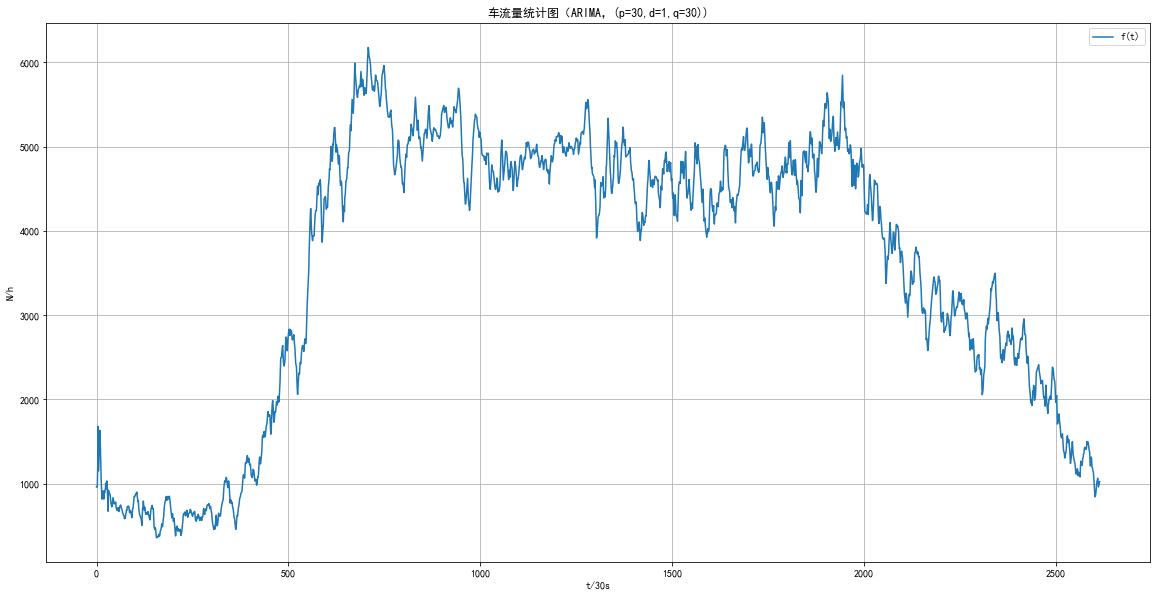

In [11]:
ARIMA(mdata,30,30)#p=30,d=1,q=30

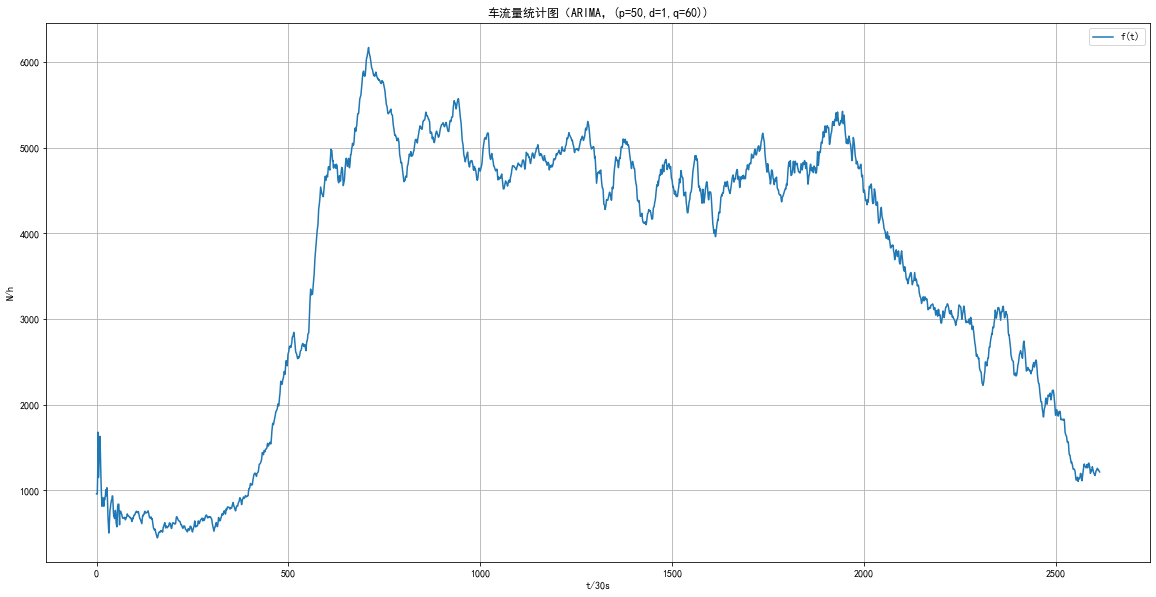

In [12]:
ARIMA(mdata,50,60)#p=50,d=1,q=60